In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../server_run/2d_fixed_beta/2d_fixed_results.csv')
df.head()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,ctam_rho,robust_m_est_bias,robust_m_est_variance,robust_mm_est_bias,robust_mm_est_variance,...,robust_s_est_variance,ols_est_bias,ols_est_variance,ols_diag_est_bias,ols_diag_est_variance,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe
0,50,0.0,1,0,4,-1.0,0.000050,0.047032,0.000054,0.047902,...,0.143304,0.000042,0.045139,0.000037,0.058137,1.071168,1.073617,1.074845,1.214844,1.085887
1,50,0.0,1,0,4,-0.8,0.000022,0.048393,0.000027,0.048737,...,0.145882,0.000038,0.046516,0.000002,0.060754,1.065535,1.070304,1.070704,1.215016,1.089547
2,50,0.0,1,0,4,-0.6,0.000036,0.048634,0.000034,0.049106,...,0.158909,0.000018,0.046067,0.000089,0.063895,1.074147,1.077754,1.078555,1.240401,1.095678
3,50,0.0,1,0,4,-0.4,0.000041,0.046583,0.000042,0.046926,...,0.154162,0.000068,0.043207,0.000033,0.060313,1.043376,1.049445,1.050006,1.203239,1.066874
4,50,0.0,1,0,4,-0.2,0.000031,0.045840,0.000033,0.046089,...,0.143695,0.000007,0.042582,0.000056,0.057476,1.051009,1.054408,1.054142,1.191968,1.069058


In [4]:
df.columns

Index(['n', 'contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff',
       'ctam_rho', 'robust_m_est_bias', 'robust_m_est_variance',
       'robust_mm_est_bias', 'robust_mm_est_variance', 'robust_s_est_bias',
       'robust_s_est_variance', 'ols_est_bias', 'ols_est_variance',
       'ols_diag_est_bias', 'ols_diag_est_variance', 'ols_mspe',
       'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe'],
      dtype='object')

In [8]:
feature_columns = ['n', 'contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff', 'ctam_rho']
mpse_columns = ['ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe']
bias_columns = ['ols_est_bias', 'robust_m_est_bias', 'robust_mm_est_bias', 'robust_s_est_bias', 'ols_diag_est_bias']
variance_columns = ['ols_est_variance', 'robust_m_est_variance', 'robust_mm_est_variance', 'robust_s_est_variance', 'ols_diag_est_variance']

In [9]:
df[feature_columns].drop_duplicates()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,ctam_rho
0,50,0.0,1,0,4,-1.0
1,50,0.0,1,0,4,-0.8
2,50,0.0,1,0,4,-0.6
3,50,0.0,1,0,4,-0.4
4,50,0.0,1,0,4,-0.2
...,...,...,...,...,...,...
303,500,0.6,1,0,4,0.2
304,500,0.6,1,0,4,0.4
305,500,0.6,1,0,4,0.6
306,500,0.6,1,0,4,0.8


In [10]:
# ploting for mpse, first melt the dataframe
df_mpse = df[feature_columns + mpse_columns]
df_mpse = df_mpse.melt(id_vars=feature_columns, value_vars=mpse_columns, var_name='method', value_name='mpse')
df_mpse['method'] = df_mpse['method'].str.replace('_mspe', '')
df_mpse.head()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,ctam_rho,method,mpse
0,50,0.0,1,0,4,-1.0,ols,1.071168
1,50,0.0,1,0,4,-0.8,ols,1.065535
2,50,0.0,1,0,4,-0.6,ols,1.074147
3,50,0.0,1,0,4,-0.4,ols,1.043376
4,50,0.0,1,0,4,-0.2,ols,1.051009


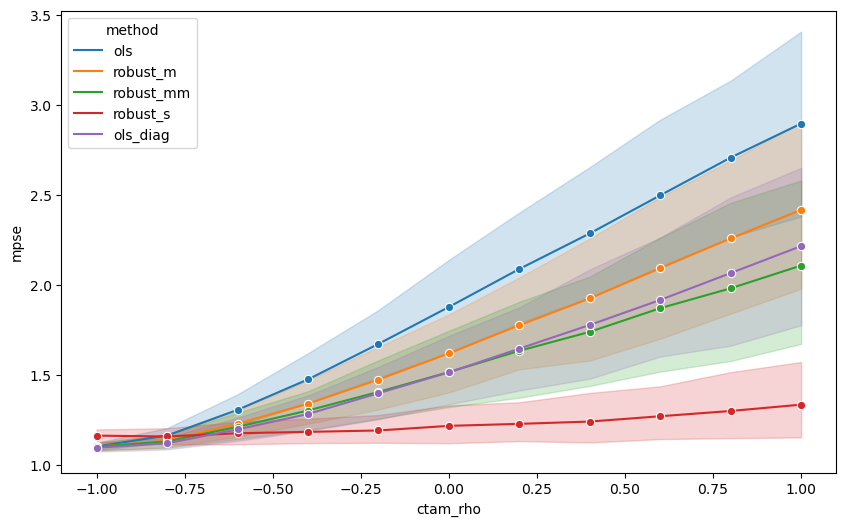

In [11]:
# plotting for mpse
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_mpse, x='ctam_rho', y='mpse', hue='method', marker='o', ax=ax)
plt.show()

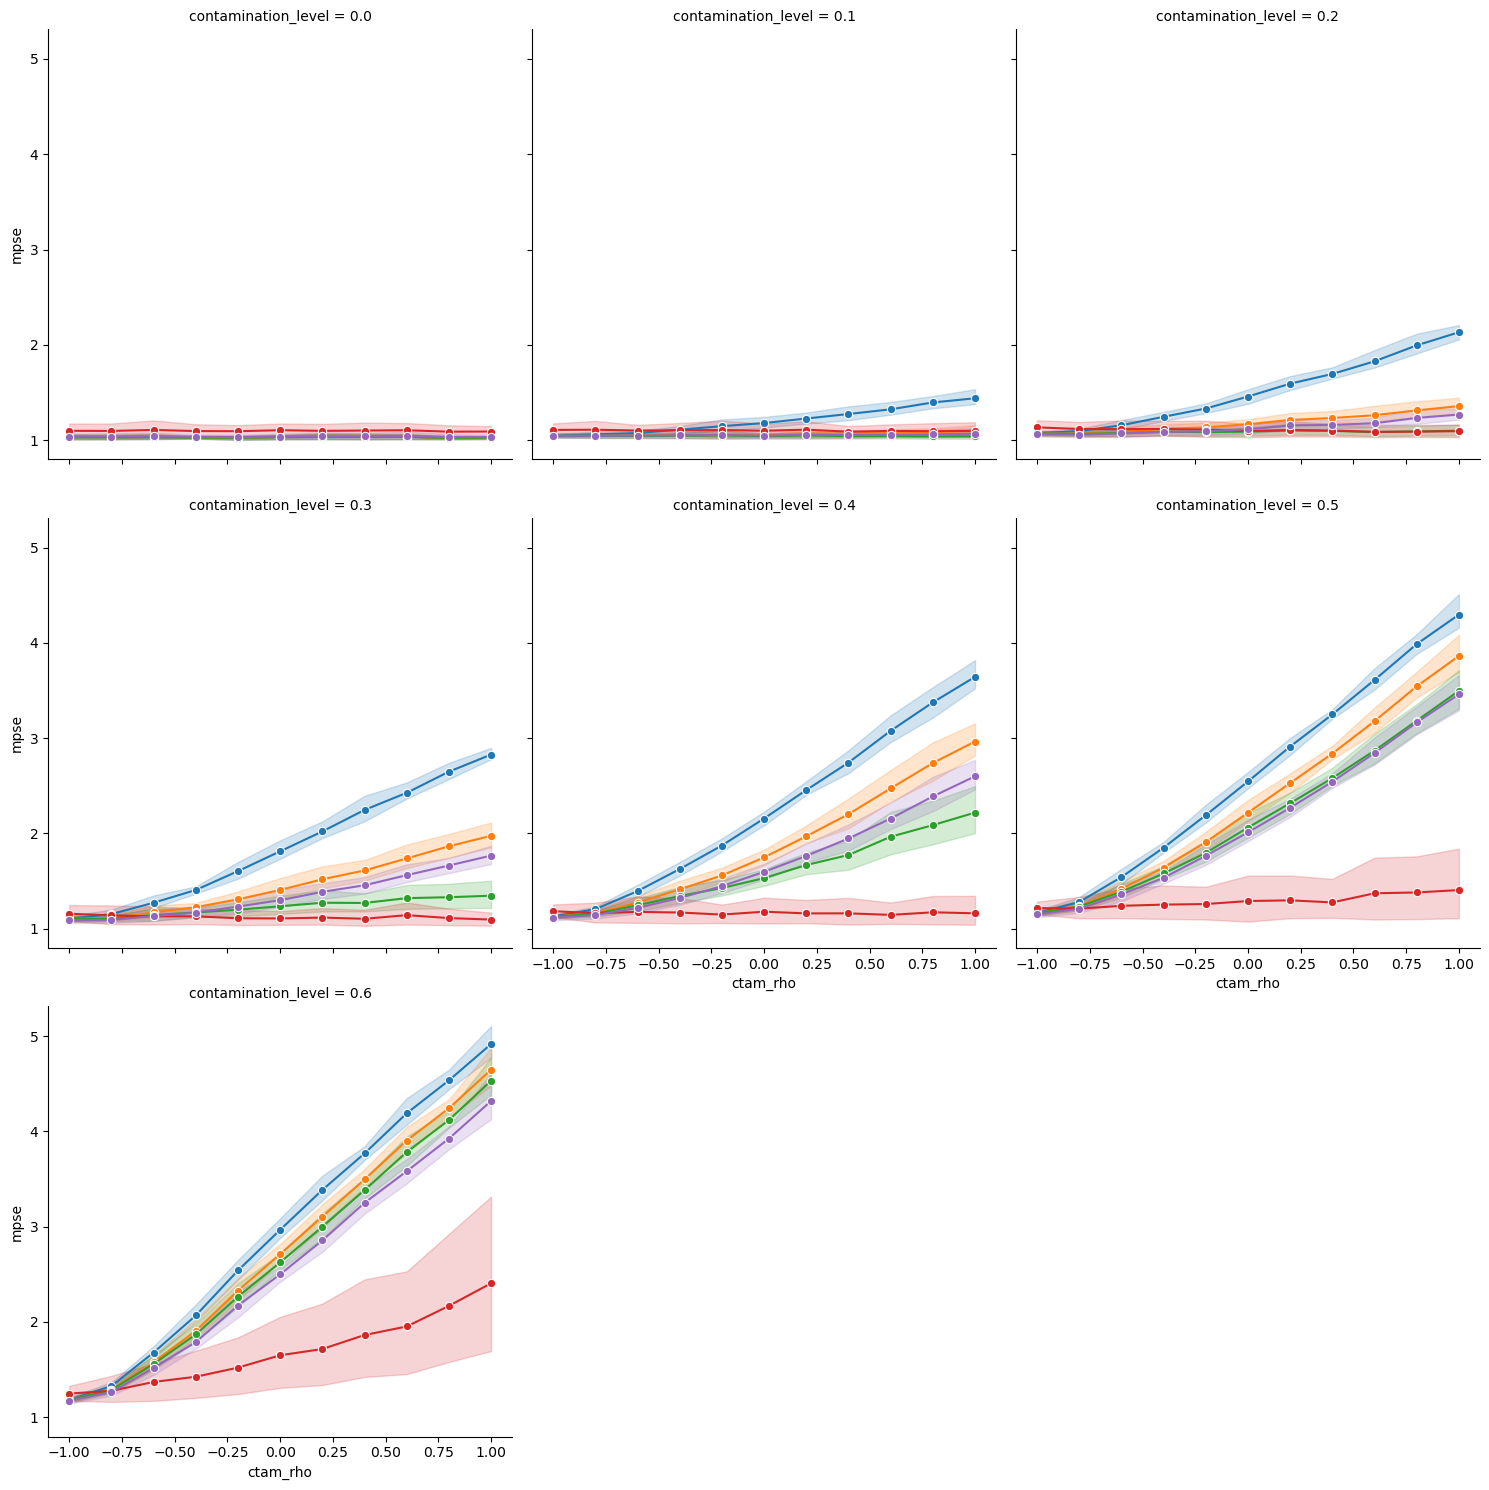

In [12]:
# facet grid by contamination level
g = sns.FacetGrid(df_mpse, col='contamination_level', col_wrap=3, height=5)
g.map(sns.lineplot, 'ctam_rho', 'mpse', 'method', marker='o')
plt.show()

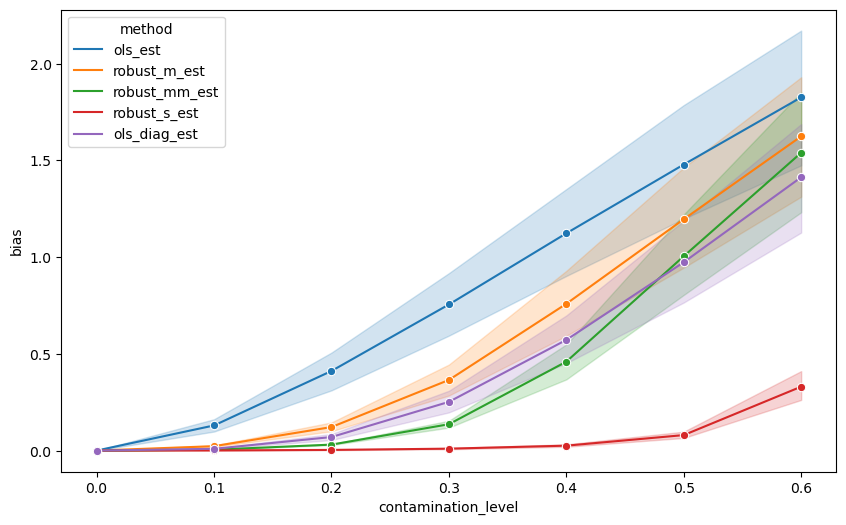

In [13]:
# bias
df_bias = df[feature_columns + bias_columns]
# set all bias to positive
df_bias[bias_columns] = df_bias[bias_columns].abs()
df_bias = df_bias.melt(id_vars=feature_columns, value_vars=bias_columns, var_name='method', value_name='bias')
df_bias['method'] = df_bias['method'].str.replace('_bias', '')
df_bias.head()

# plotting for bias
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_bias, x='contamination_level', y='bias', hue='method', marker='o', ax=ax)
plt.show()


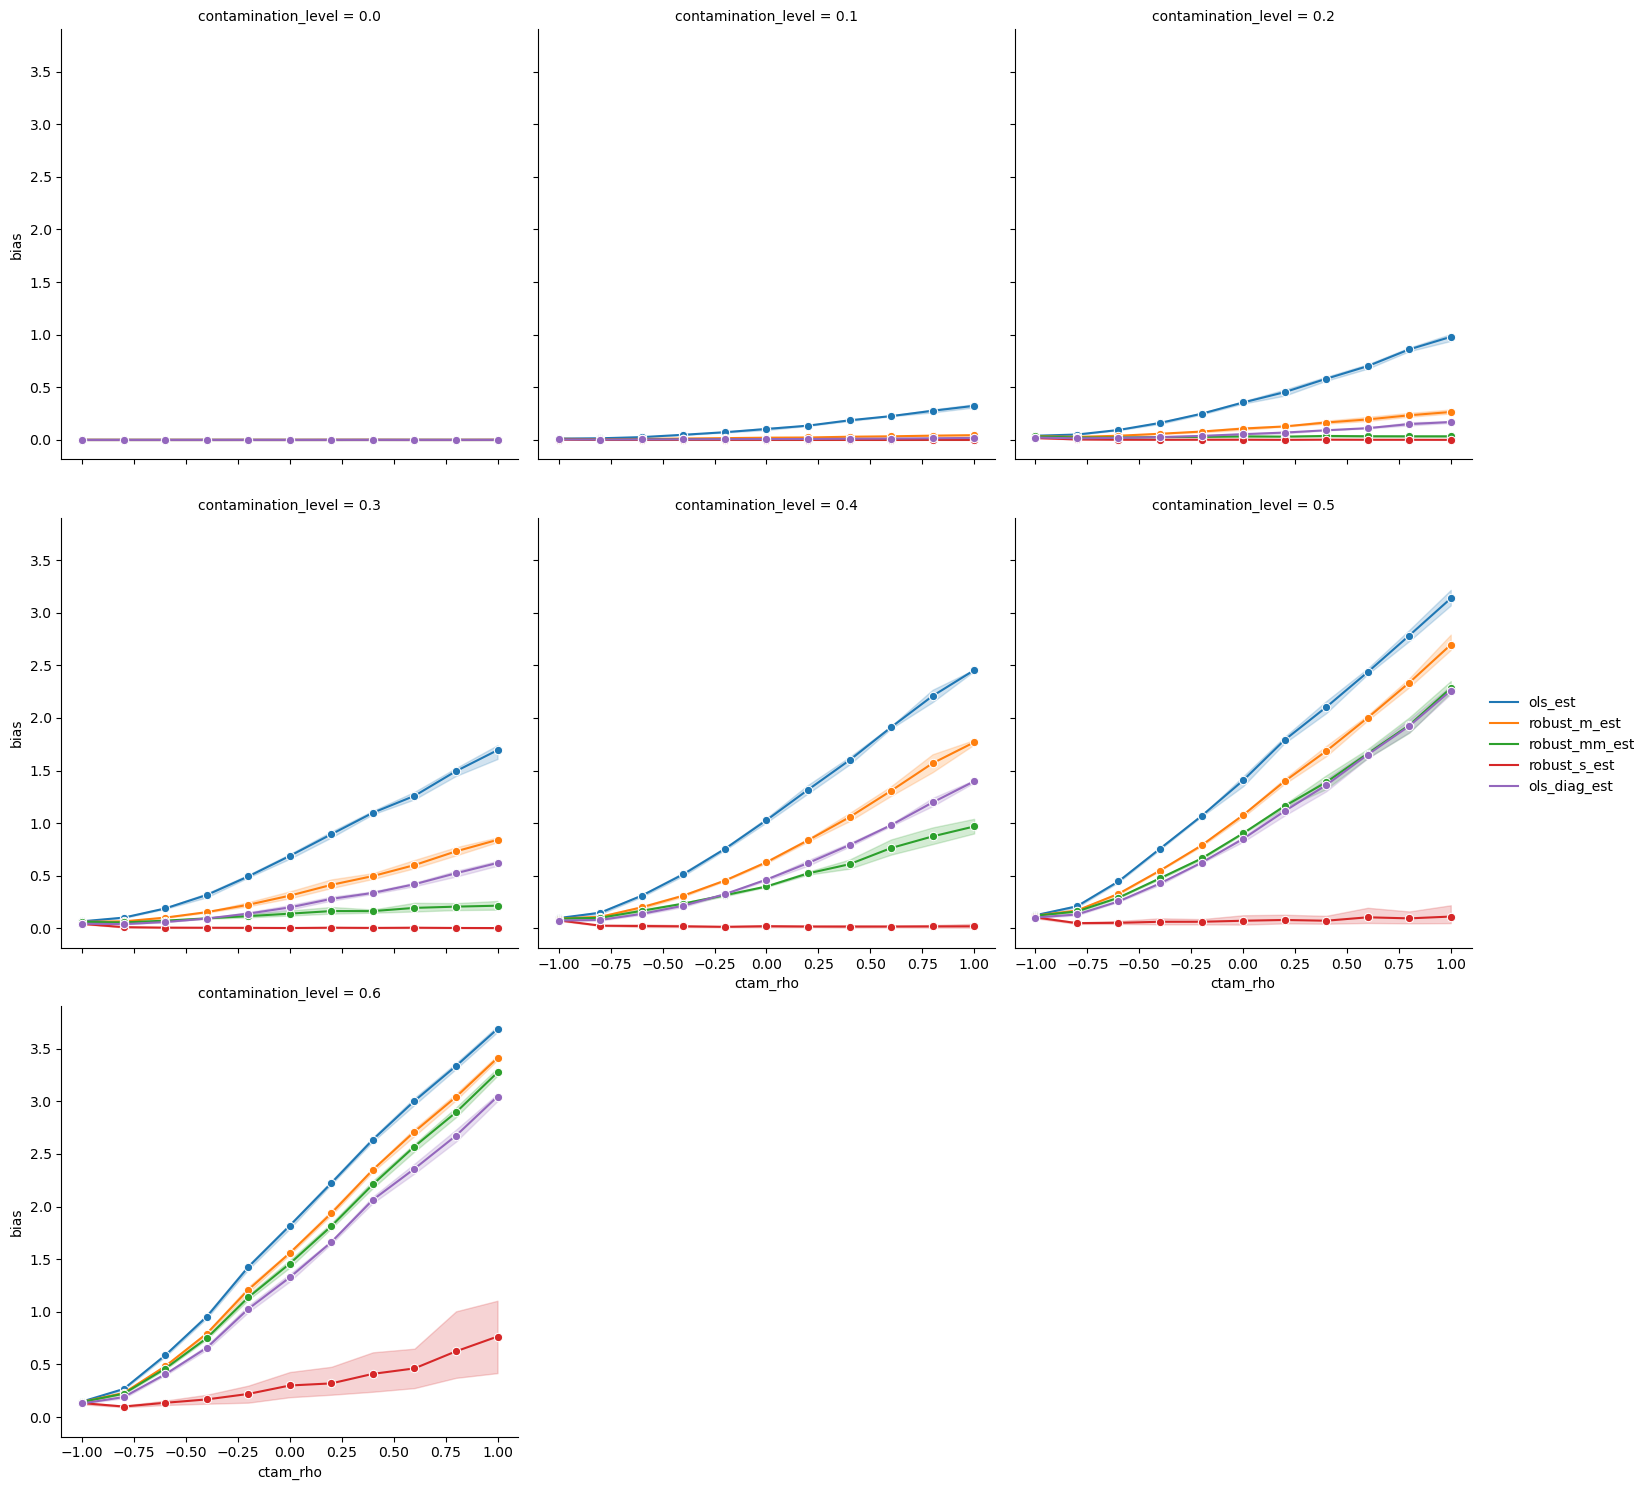

In [18]:
# by rho and facet by contamination level
g = sns.FacetGrid(df_bias, col='contamination_level', col_wrap=3, height=5)
g.map(sns.lineplot, 'ctam_rho', 'bias', 'method', marker='o')
g.add_legend()
plt.show()


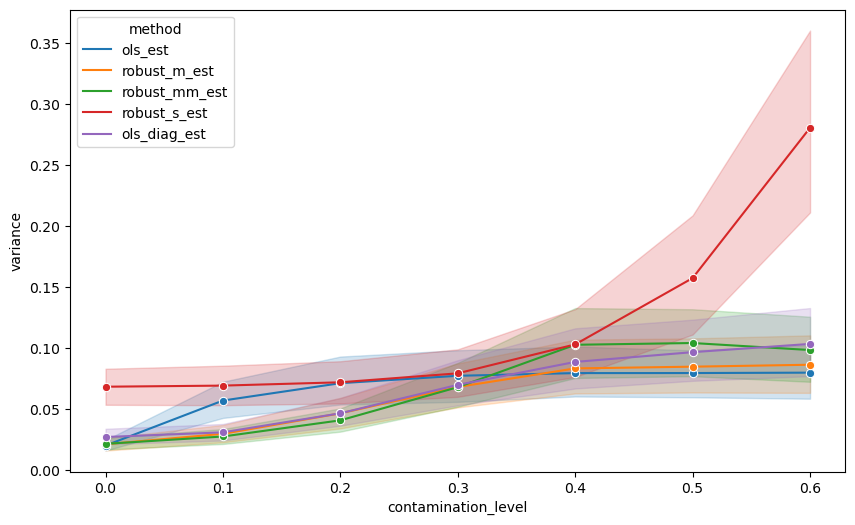

In [14]:
# variance
df_variance = df[feature_columns + variance_columns]
df_variance = df_variance.melt(id_vars=feature_columns, value_vars=variance_columns, var_name='method', value_name='variance')
df_variance['method'] = df_variance['method'].str.replace('_variance', '')
df_variance.head()

# plotting for variance
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_variance, x='contamination_level', y='variance', hue='method', marker='o', ax=ax)
plt.show()
